# Training a convolution neural network to classify handwritten numbers

Trains a simple convnet on the MNIST dataset.

In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np

Import modules from keras. 

As before, we will use a `Sequential` model with a `Dense` layer. Additionally, however, we are going to use the 2D convolutional layers `Conv2D` and `MaxPooling2D`.

We will use the mnist dataset.

In [2]:
#import keras
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.datasets import mnist
from keras.utils import to_categorical

Using TensorFlow backend.


# Preparing the data

__Loading the image data__

The image data will be imported as tensors of shape: NUM x WIDTH x HEIGHT.

The labels will be imported as tensors of shape: NUM x 1

In [3]:
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(y_train.shape)

num_classes = 10

# to save time, we will only use the first 25% of the data
fraction = 0.10
cut = int(x_train.shape[0]*fraction)
x_train = x_train[:cut]
y_train = y_train[:cut]
cut = int(x_test.shape[0]*fraction)
x_test = x_test[:cut]
y_test = y_test[:cut]

# input image dimensions
img_rows, img_cols = x_train.shape[1:]
print('img_rows = {}, img_cols = {}'.format(img_rows, img_cols))


(60000, 28, 28)
(60000,)
img_rows = 28, img_cols = 28


Plot some samples from the image data set with titles showing the ground truth labels

5


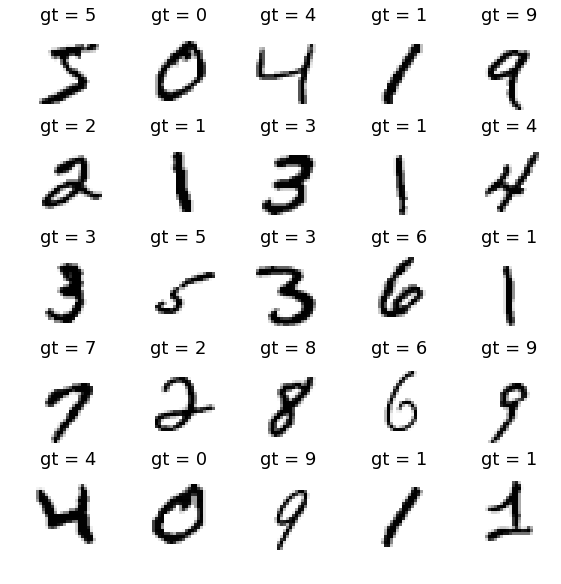

In [4]:
def plot_images(images, labels, gt=None):
    # reduce empty dimensions, if any
    images = np.squeeze(images)
    labels = np.squeeze(labels)
    numrows=int(np.ceil(np.sqrt(images.shape[0])))
    print(numrows)
    fig, axes = plt.subplots(nrows=numrows, ncols=numrows, figsize=(8,8), sharex=True, sharey=True)
    fig.tight_layout()
    axes = axes.flatten()
    for i, ax in enumerate(axes):
        ax.imshow(images[i], cmap=plt.get_cmap('gray_r'))
        ax.set_title('gt = {}'.format(labels[i]), fontsize=18)
        ax.axis('off')
        
        # highlight wrong predictions is gt (ground truth) is provided
        if gt is not None:
            if gt[i] != labels[i]:
                ax.imshow(images[i], cmap=plt.get_cmap('viridis'))
                ax.set_title('{}≠{}'.format(labels[i], gt[i]), fontsize=18, fontdict={'color':'red'})

plot_images(x_train[:25], y_train[:25])

We must be very careful about the format in which we should provide our data to the network.

If you use Tensorflow as a backend (as we are doing here), the image data should be provided in a format with the channels (e.g. RGB) as last dimension:

_NUM x WIDTH x HEIGHT x CHANNELS_ (NWHC)

If you use Theano as a backend, the dimensional ordering is NCWH (channels before).

Although we are dealing with grayscale image data and only have a single channel, we still need to add a dimension for the channels to obtain a 4D input tensor.


In [5]:
X_train = np.expand_dims(x_train, 3)
X_test = np.expand_dims(x_test, 3)
print('New shape: {}'.format(X_train.shape))

New shape: (6000, 28, 28, 1)


__Preprocessing__

We will convert from uint8 to float encoding and scale the values in our image to lie between 0 and 1.

In [6]:
X_train = X_train.astype('float32')
X_train = X_train.astype('float32')
X_train /= 255.
X_train /= 255.
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (6000, 28, 28)
6000 train samples
1000 test samples


__One-hot encoding__

We need to convert the labels using the one-hot encoding scheme

In [7]:
# convert class vectors to binary class matrices
Y_train = to_categorical(y_train, num_classes)
Y_test = to_categorical(y_test, num_classes)

# Define a convolutional neural network

In [16]:
model = Sequential()

## Convolutional part

# conv layer with 32 3x3 filters and retified linear activation units
# Note: first layer requires the specification of an input shape
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=X_train.shape[1:]))
# conv layer with 64 3x3 filters and retified linear activation units
model.add(Conv2D(64, kernel_size=(3, 3), strides=(2,2), activation='relu'))
# max pooling with size 2x2
#model.add(MaxPooling2D(pool_size=(2, 2)))
# dropout layer
model.add(Dropout(0.25))

## Multilayer perceptron (MLP) part

# first, we need to flatten the output of the conv to obtain a vector
model.add(Flatten())
# add a dense NN layer (= fully connected layer of neurons) with ReLU activation
model.add(Dense(128, activation='relu'))
# dropout layer
model.add(Dropout(0.5))
# final layer is equal to the number of classes and uses SoftMax activation 
model.add(Dense(num_classes, activation='softmax'))

__Compile the network__

To compile the network, we need to choose a loss function and an optimizer. 

In [17]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
dropout_7 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total para

# Train the neural network

In [11]:
batch_size = 128
epochs = 12

In [ ]:
history = model.fit(X_train, Y_train,
                      batch_size=batch_size,
                      epochs=epochs,
                      verbose=1,
                      validation_data=(X_test, Y_test))


In [ ]:
def plot_history(history, validation=False):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5), sharex=True)
    #fig.tight_layout()
    # plot history for loss
    ax[0].plot(history.history['loss'])
    if validation:
        ax[0].plot(history.history['val_loss'])
    ax[0].set_title('Loss')
    ax[0].set_ylabel('Loss')
    ax[0].set_ylim(bottom=0.)
    ax[0].set_xlabel('Epoch')
    ax[0].legend(['train', 'test'])
    
    # plot history for F score etc.
    ax[1].plot(history.history['acc'])
    if validation:
        ax[1].plot(history.history['val_acc'])
    ax[1].set_title('Accuracy')
    ax[1].set_ylim(bottom=0., top=1.0)
    ax[1].set_ylabel('Accuracy')
    ax[1].set_xlabel('Epoch')
    ax[1].legend(['train', 'test'])

plot_history(history, validation=True)

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Predict unseen examples

In [ ]:
num=36
import time
start = time.time()
y_pred = model.predict(X_test[:num], verbose=1, batch_size=12)
end = time.time()
print('Exec time per prediction = {:.3f}'.format((end-start)/num))

Predictions are returned as vectors in one-hot encoding. Or rather, they are the activations of the last layer in the NN.

To convert them back to class numbers (0-9), we want to get the index of the output neuron with the highest activation using `argmax`.

In [ ]:
Y_pred = np.argmax(y_pred, axis=1)

In [ ]:
plot_images(X_test[:num], Y_pred, gt=y_test[:num])